founder: Dirk Derichsweiler, Contributors: Isabel Steinhauer, August 2023
# Seamlessly Integrate Multiple Data Sources as One with Ease: (PRESTO)

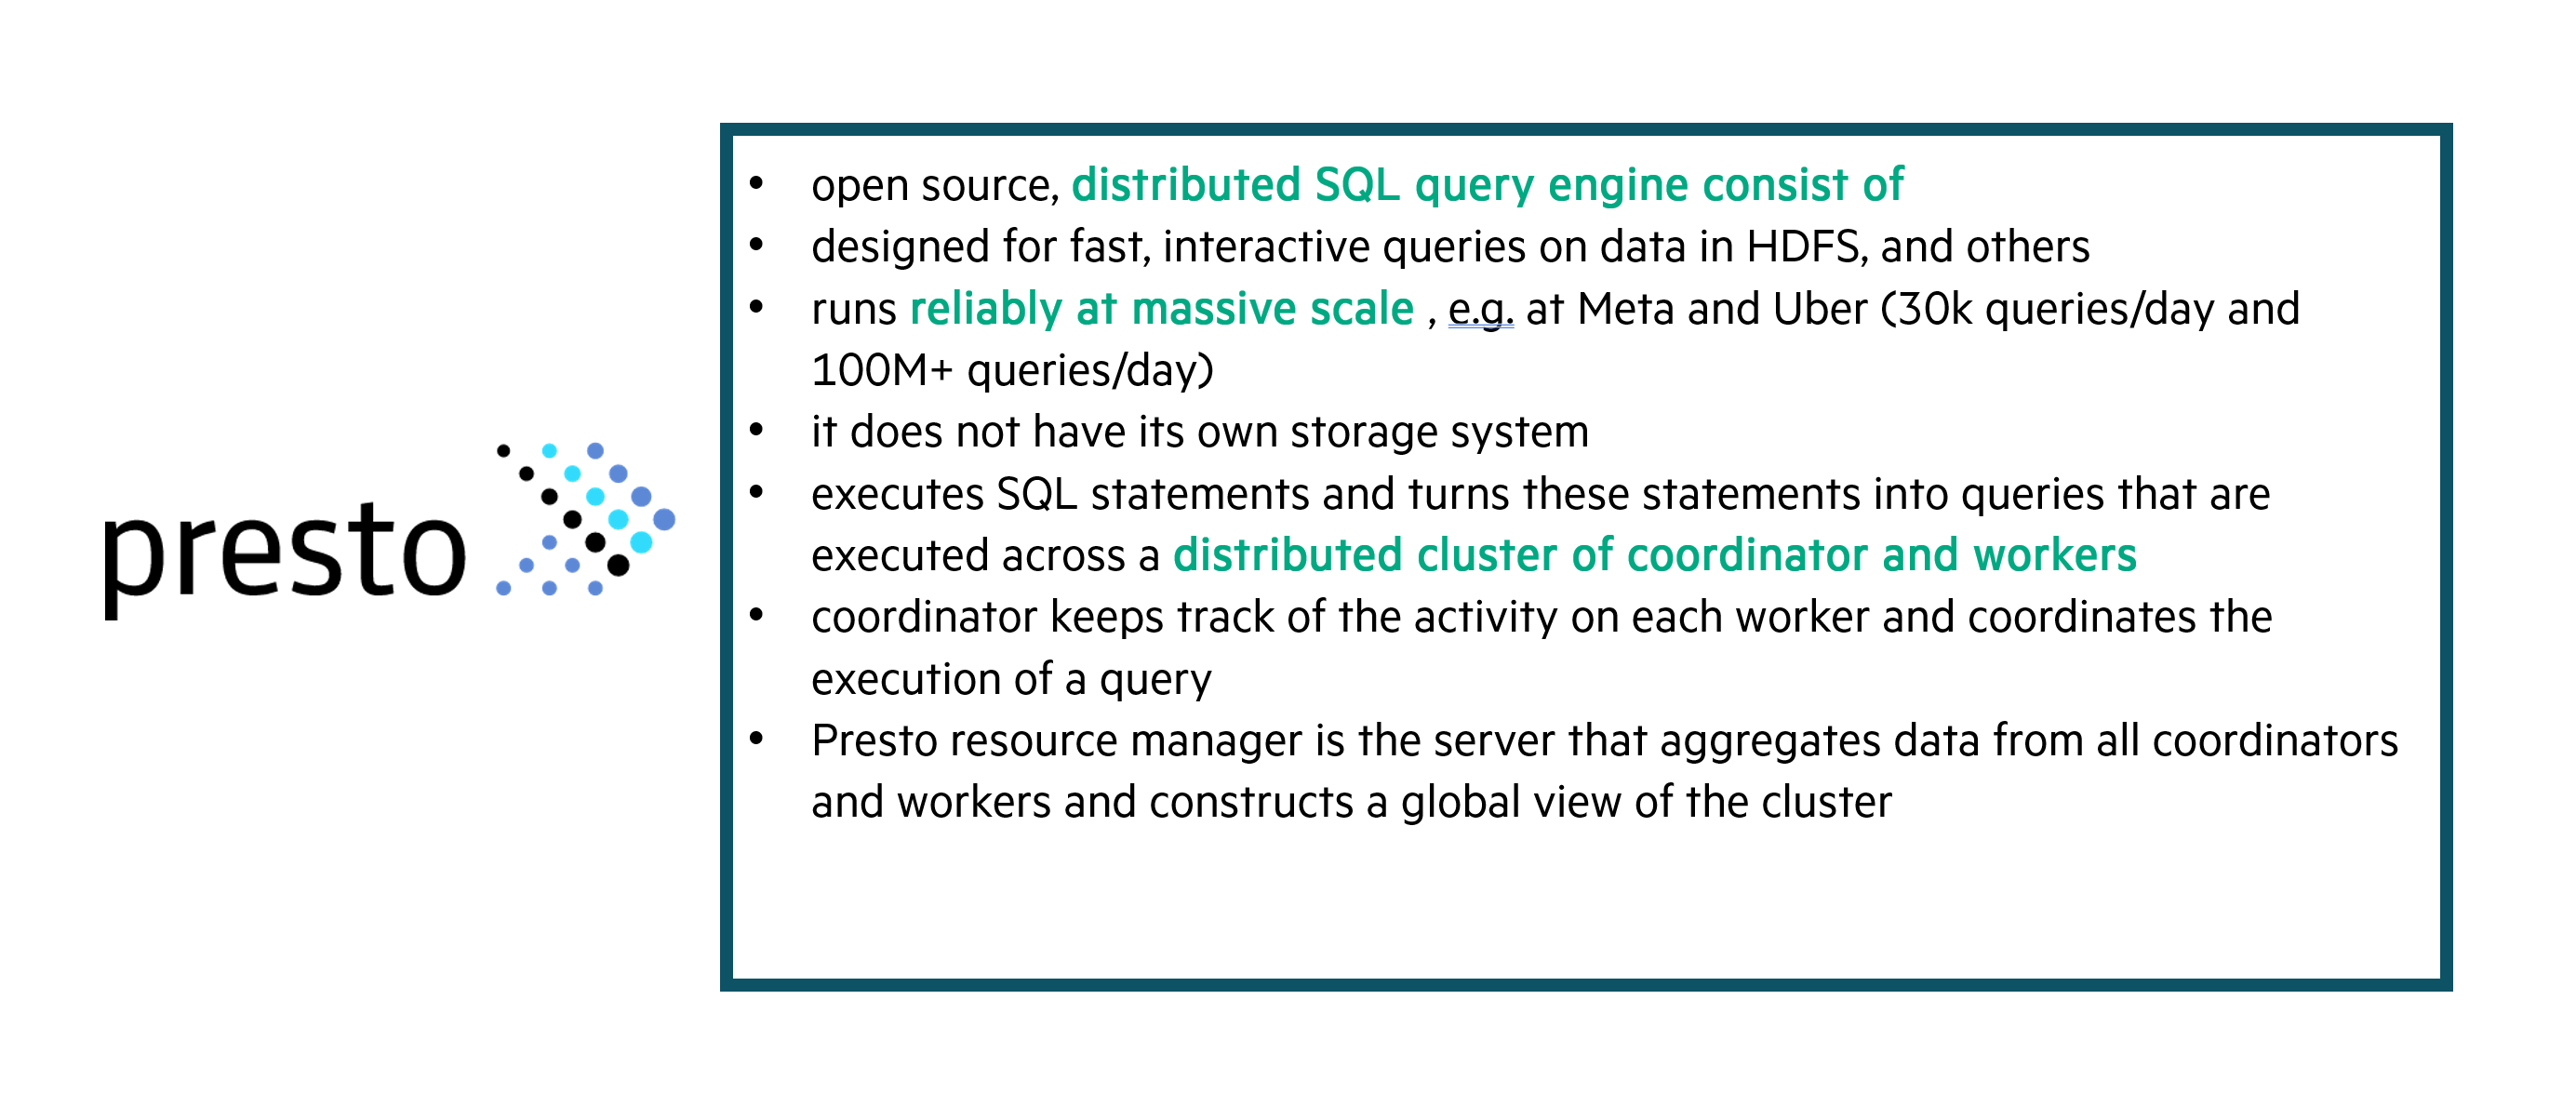

Detail information:  

Database Germany  
discover_2023_german_mariadb
MariaDB  
Endpoint:  
jdbc:mysql://germandb.ezmeral.de:31219  
Username:  
dderichswei  
DB-Name:  
discover  
  
  
Database Czech  
discover_2023_czech_mysql 
MySQL  
Endpoint:  
jdbc:mysql://czechdb.ezmeral.de:31969  
Username:  
dderichswei  
DB-Name:  
discover  
  
Database Swiss  
discover_2023_swiss_mysql
MySQL  
Endpoint:   
jdbc:mysql://swissdb.ezmeral.de:31870  
Username:  
dderichswei  
DB-Name:  
discover  

In order to query data form the datasources previously added to EZUA we use Presto. Head to the Query Editor to follow the demo.   
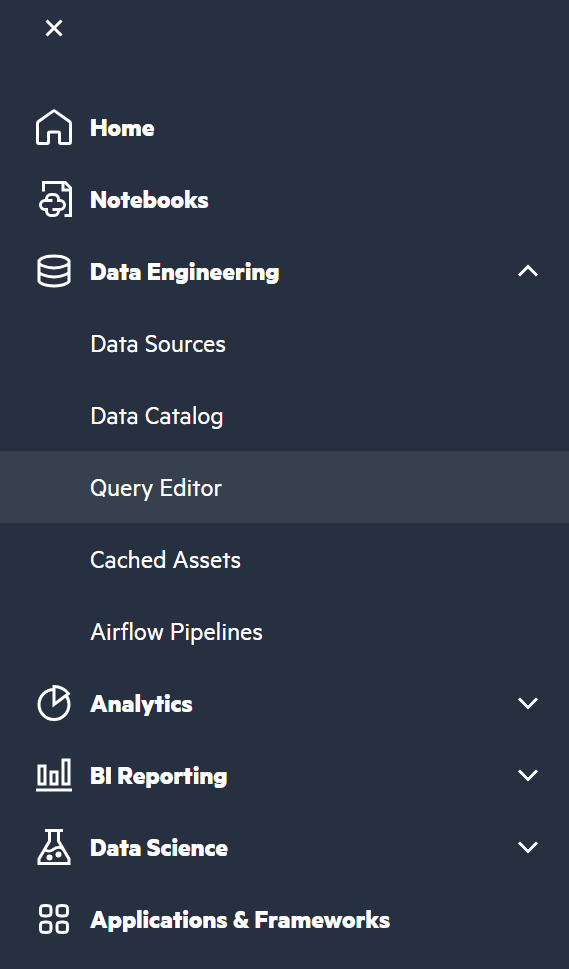

With ezPresto you have the possibility to work in several Workbooks. In a query you can combine multiple datasources like here: 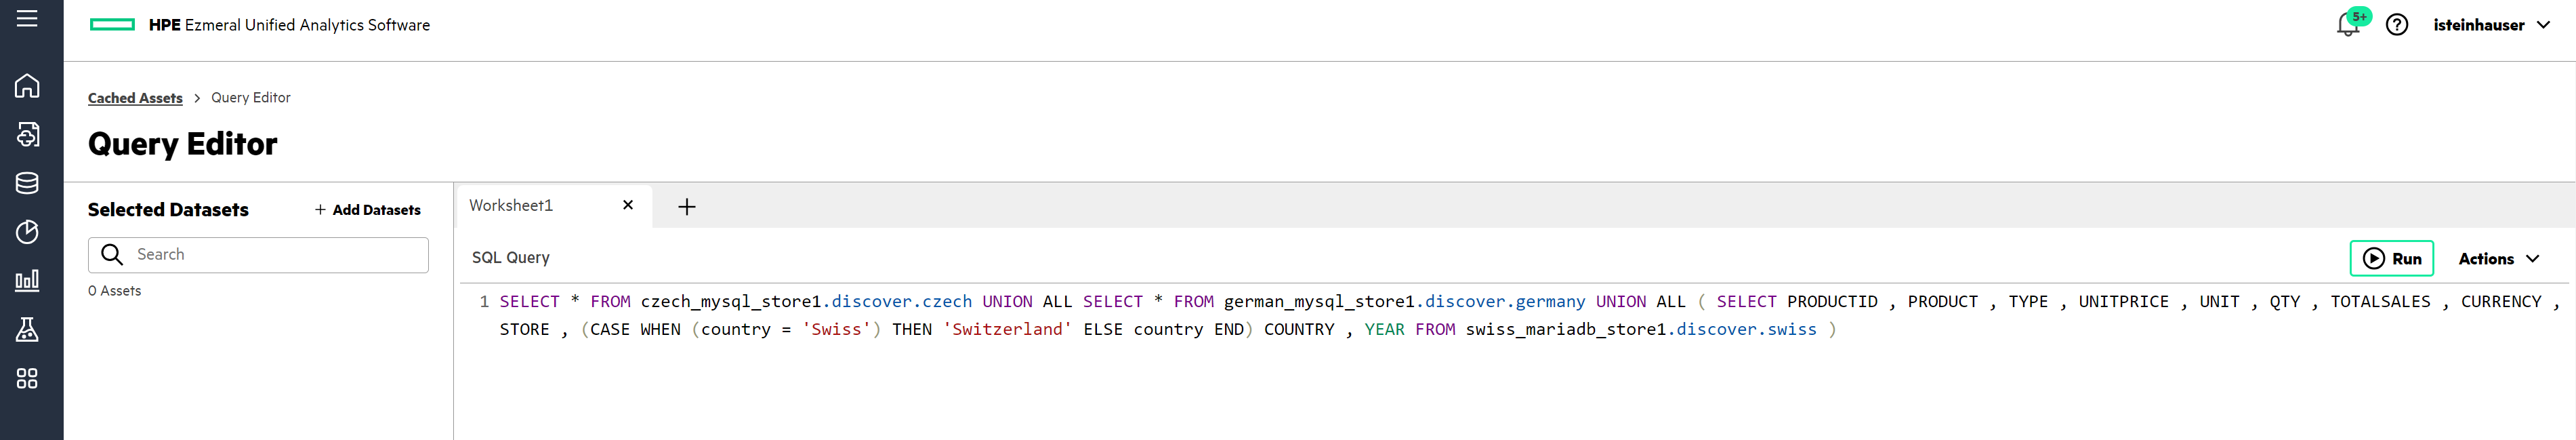

The query of the picture is the following. Adapt according to the datasources you have added in your environment:
```sql
SELECT * FROM czech_mysql_store1.discover.czech UNION ALL SELECT * FROM german_mysql_store1.discover.germany UNION ALL ( SELECT PRODUCTID , PRODUCT , TYPE , UNITPRICE , UNIT , QTY , TOTALSALES , CURRENCY , STORE , (CASE WHEN (country = 'Swiss') THEN 'Switzerland' ELSE country END) COUNTRY , YEAR FROM swiss_mariadb_store1.discover.swiss )
```

You can save a query also __as View__ and access and use it later as so-called __Cached Asset__ , e.g. to use the data to create a dashboard in Suoerset, which we will do later on. 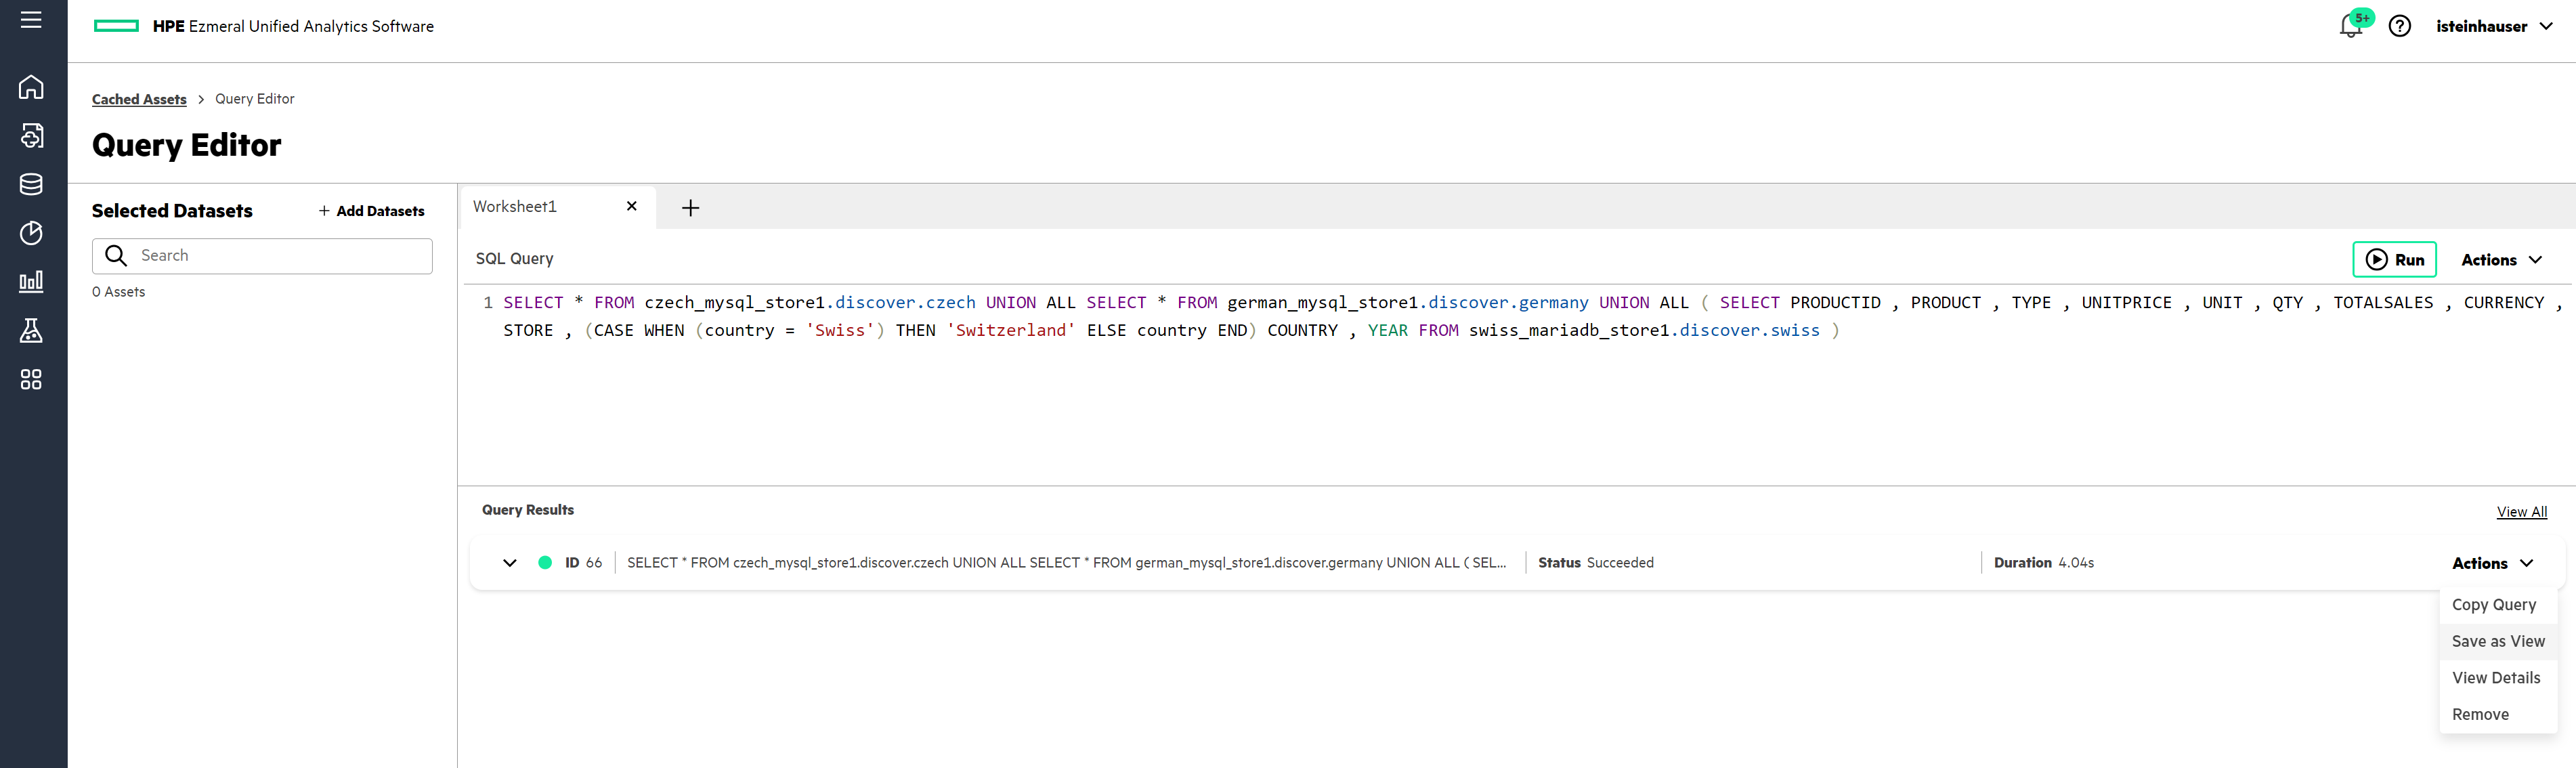
Please save your query as View choosing a name you prefer.

If you didn't add the datasources yourself, maybe you want to browse which datasources are available in the platform. Therefore you can use the __Data Catalog__ You can access it either from the query editor when you hit __+Add Datasets__ or from the burger menu bar selecting __Data Catalog__. In the data catalog all connected datasources are visible as well as the tables: 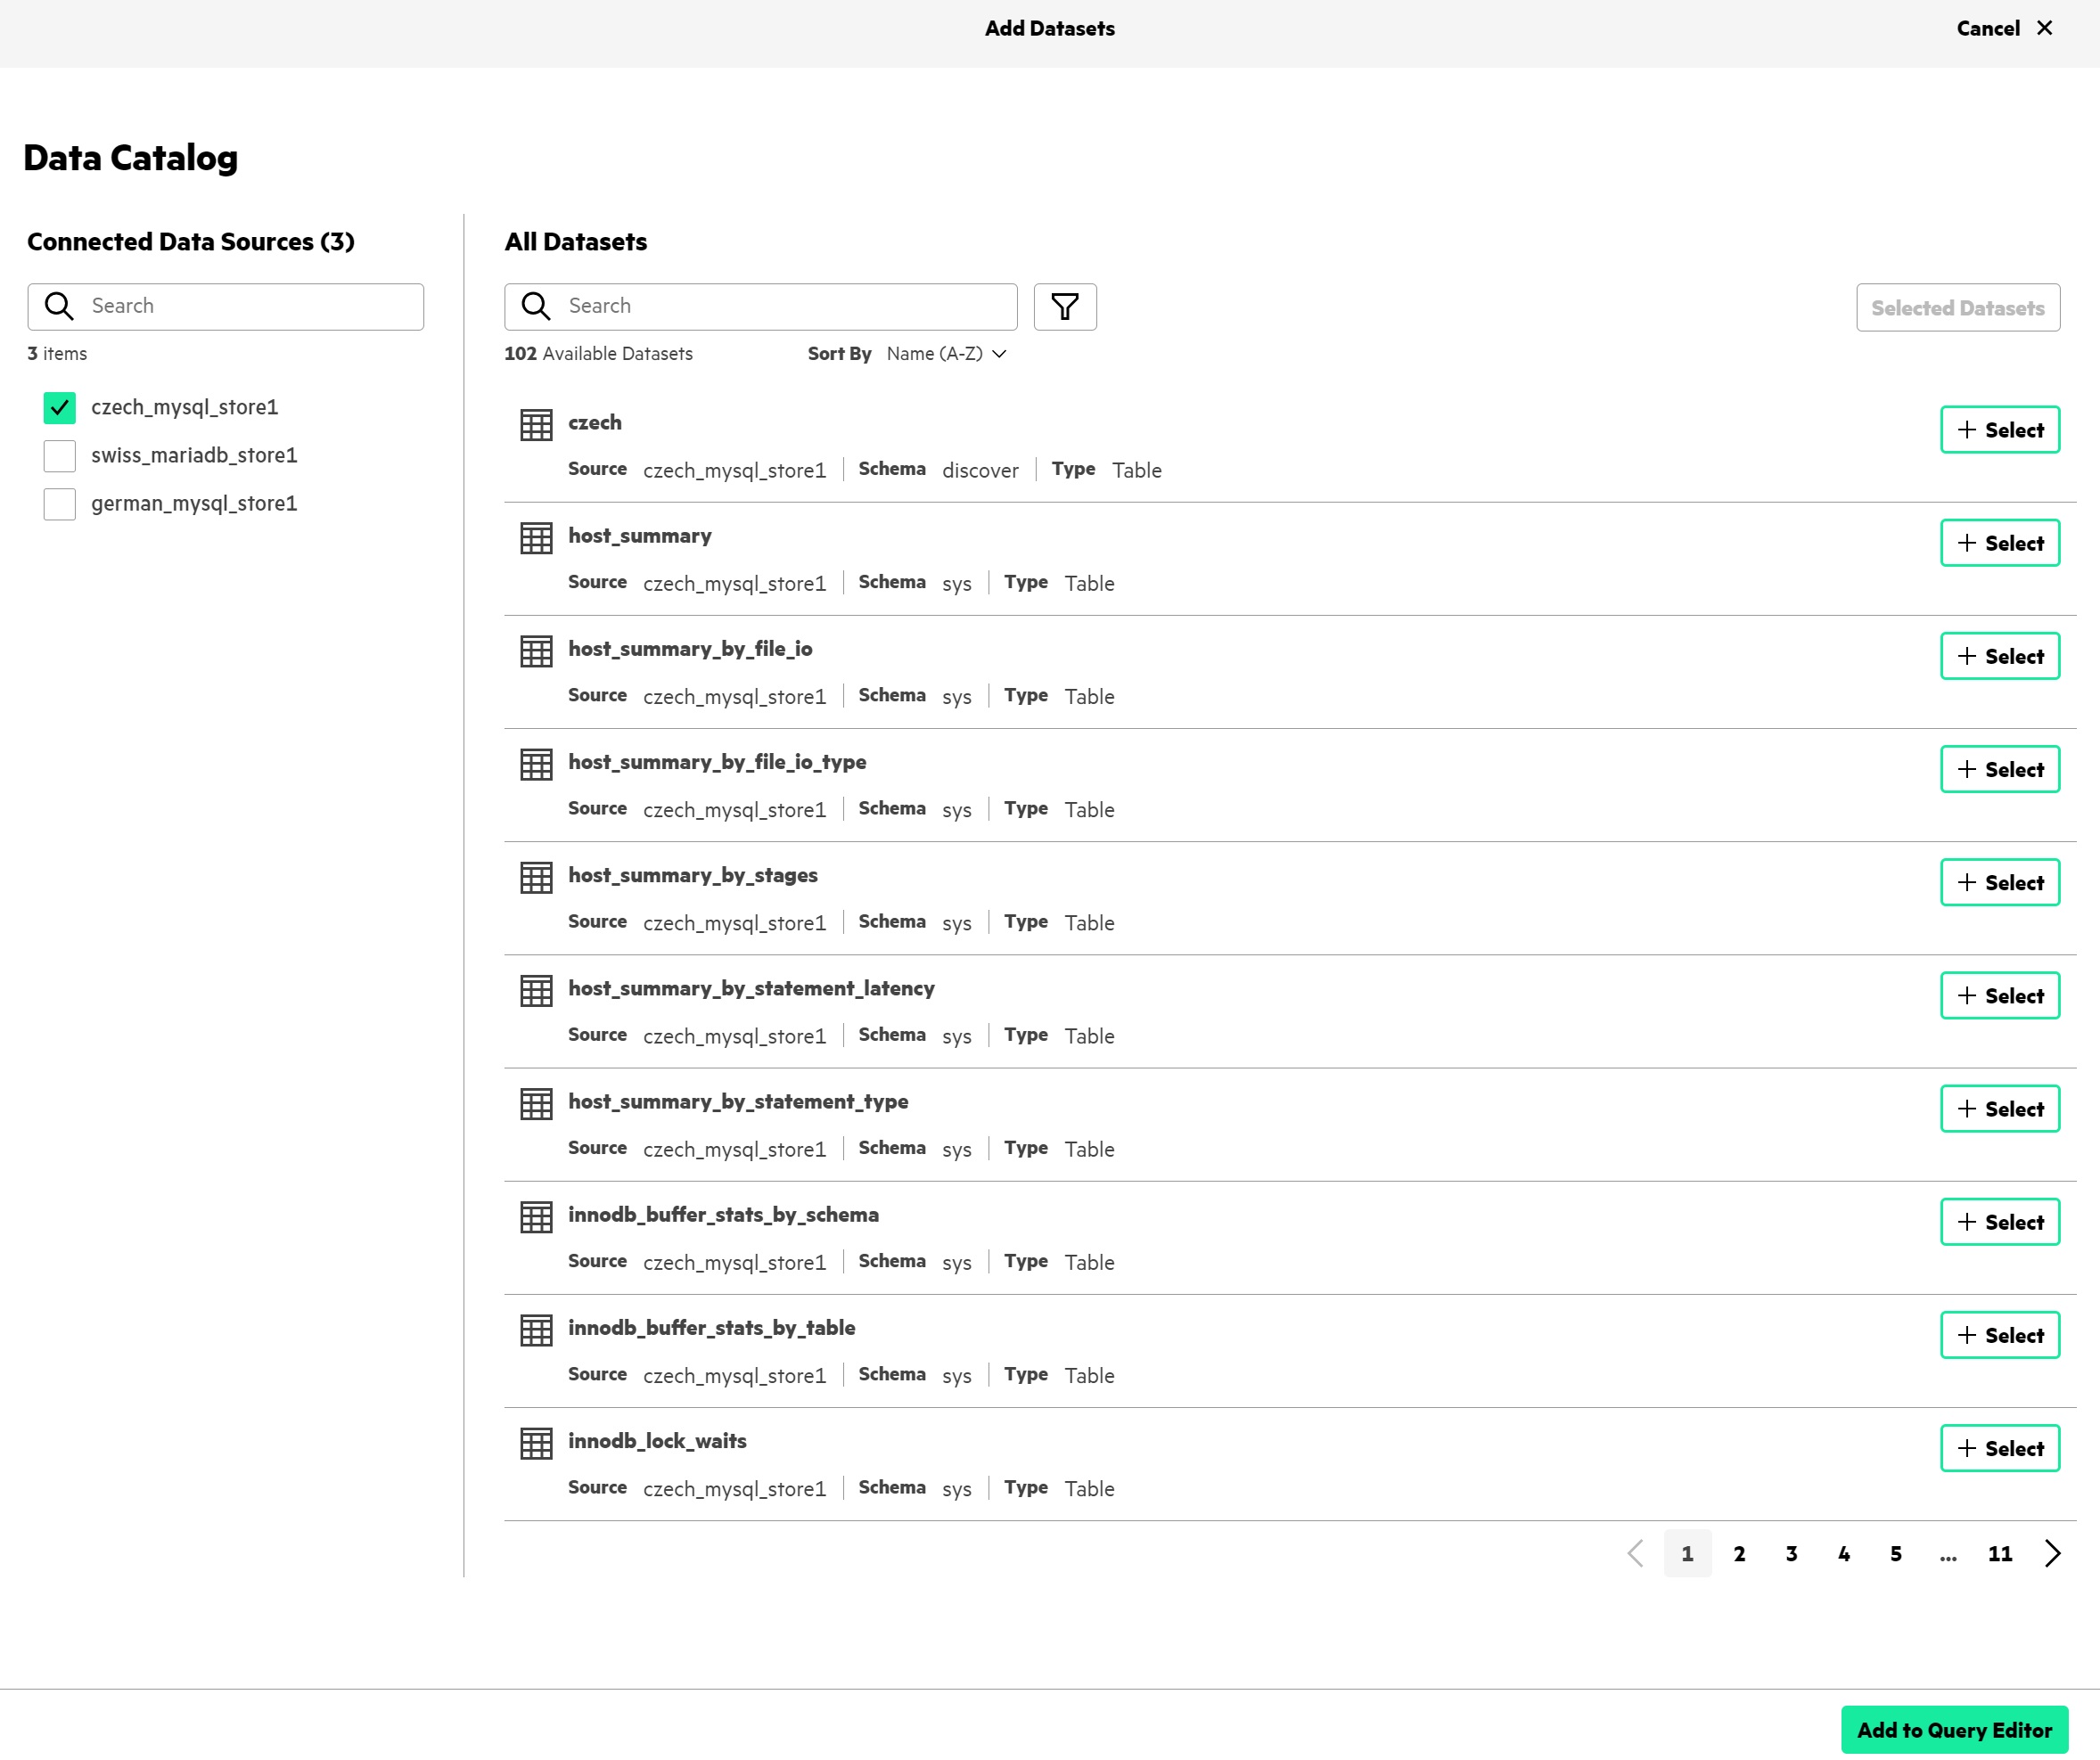

You can also query your data within the jupyter notebooks or your custom application __programmatically__. We will do this later on in the custom retail app. Find a code snippet which defines a query_presto function in the following as example of how to connect to ezPresto with Python:
```python
# Set up ezPresto connection credentials
presto_url = "ezpresto.ezua-cb.ezmeral.demo.local";
user = "youruser";
password = "yourpassword";

class DBComponentEzsql(object):
    def __init__(self, **args):
        self._db_version = str
        self._http_scheme = args['http_scheme']
        self._schema = args['schema']
        self._catalog = args['catalog']
        self._host = args['host']
        self._user = args['user']
        self._pwd = args['password']
        self._port = args['port']
        self._test_query= "select database();"
        self._cursor = object
        self._connection = object
        self._err = "Exception while connecting to PrestoDB, there, check with your Administrator !!!"
    
    # this is the prestodb connect component user defined function.
    def _connect(self)->object:
        try:
            with prestodb.dbapi.connect(host=self._host, port=self._port, user=self._user, catalog=self._catalog, schema= self._schema, http_scheme=self._http_scheme, auth=prestodb.auth.BasicAuthentication(self._user, self._pwd)) as self._connection:
                self._connection._http_session.verify = False

            if self._connection:
                return self._connection

        except Exception as e:
            print(self._err, e)
            exit(0)

        finally:
            if self._connection:
                self._connection.close()
#Connection to Presto                
ezobj = DBComponentEzsql(
            host=presto_url, 
            catalog="german_mysql_store1",
            schema="discover",
            user= user,
            password=password, 
            http_scheme = "https",
            port=443)

conn = ezobj._connect()
def query_presto(product):
    # to be developed this is a quick tweak
    cur = ezobj._connection.cursor()
    cur.execute("SELECT unitprice from german_mysql_store1.discover.germany WHERE product = '"+product+"'")   
    res_data = cur.fetchall()
    return res_data[0][0]
```

# Video

In [2]:
%%HTML
<video width="1024" height="768" controls>
  <source src="../videos/4-fast.mp4" type="video/mp4">
</video>